In [1]:
import tkinter as tk
from tkinter import filedialog
import os
import pandas as pd
import unicodedata
import string
from typing import List


In [2]:
selected_path = ""

def select_folder():
    global selected_path 
    folder = filedialog.askdirectory()
    selected_path = folder 
    entry_folder.delete(0, "end") 
    entry_folder.insert(0, folder) 

def generate_dashboard():
    if selected_path:
        print("Gerando Dashboards em:", selected_path)
        window.destroy()

window = tk.Tk()
window.geometry('640x360')
window.title("Selecionar Pasta")

label = tk.Label(window, text="Digitar Caminho:", padx=10)
label.pack(side='left')

entry_folder = tk.Entry(window)
entry_folder.pack(side='left')

button_ok = tk.Button(window, text="Procurar Caminho", command=select_folder, padx=70)
button_ok.pack(side='right')

button_save = tk.Button(window, text="Salvar Caminho", command=lambda: button_generate.place(x=240, y=310))
button_save.pack(side='bottom', pady=70)

button_generate = tk.Button(window, text="Gerar Dashboards", command=generate_dashboard, padx=30)
button_generate.pack_forget()

window.mainloop()

Gerando Dashboards em: /home/guisales/projeto-fort/teste_1


In [3]:
def is_any_csv(path: str):
    count_csv_files = 0
    for file in os.listdir(path):
        if file.split('.')[-1] == 'csv':
            count_csv_files += 1

    if count_csv_files == 0:
        return ValueError('Não há arquivos .csv para gerar o(s) dashboard(s)')

In [4]:
def preprocess_text(text):
    text = ''.join([c for c in unicodedata.normalize('NFKD', text) if not unicodedata.combining(c)])
    
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    
    text = text.lower()
    
    return text

In [5]:
def transform_note(note, kind=None):
    if kind == 'to_int':
        match note:
            case 'otimo':
                return 5
            case 'bom':
                return 4
            case 'regular':
                return 3
            case 'ruim':
                return 2
            case 'pessimo':
                return 1
    else:
        match note:
            case 5:
                return 'Ótimo'
            case 4:
                return 'Bom'
            case 3:
                return 'Regular'
            case 2:
                return 'Ruim'
            case 1:
                return 'Péssimo'

In [6]:
def get_aval_data(path: str):
    
    avals = []
    
    for aval in os.listdir(path):
        df = pd.read_csv(f'{path}/{aval}')
        avals.append({
        'professor': preprocess_text(df['professor'].to_string(index=False)),
        'escola': preprocess_text(df['escola'].to_string(index=False)),
        'data': df['data'].to_string(index=False),
        'turno': preprocess_text(df['turno'].to_string(index=False)),
        'ano': preprocess_text(df['ano'].to_string(index=False)),
        'autoavaliação': preprocess_text(df['autoavaliação'].to_string(index=False)),
        'avaliação_curso': preprocess_text(df['avaliação do curso'].to_string(index=False)),
        'nome_formador': preprocess_text(df['nome do formador'].to_string(index=False)),
        'dominio_conteudo': preprocess_text(df['domínio do conteúdo'].to_string(index=False)),
        'capacidade_lideranca': preprocess_text(df['capacidade de liderança'].to_string(index=False)),
        'clareza': preprocess_text(df['clareza'].to_string(index=False)),
        'relacionamento': preprocess_text(df['relacionamento'].to_string(index=False)),
        'metodologia': preprocess_text(df['metodologia trabalhada'].to_string(index=False)),
        'pontos_positivos': preprocess_text(df['pontos positivos'].to_string(index=False)),
        'pontos_negativos': preprocess_text(df['pontos negativos'].to_string(index=False)),
        'sugestoes': preprocess_text(df['sugestões'].to_string(index=False)),
        'experiencia': preprocess_text(df['experiência'].to_string(index=False))
        })
        
    return avals

In [7]:
def get_course_aval(all_avals: list):

    dom_cont = 0
    cap_lider = 0
    clareza = 0
    relac = 0
    metodo = 0
    count_avals = 0

    for aval in all_avals:
        dom_cont += transform_note(aval['dominio_conteudo'], 'to_int')
        cap_lider += transform_note(aval['capacidade_lideranca'], 'to_int')
        clareza += transform_note(aval['clareza'], 'to_int')
        relac += transform_note(aval['relacionamento'], 'to_int')
        metodo += transform_note(aval['metodologia'], 'to_int')
        count_avals += 1

    return dom_cont, cap_lider, clareza, relac, metodo, count_avals, count_avals

In [8]:
def get_professor_aval(all_avals: list, professor_name: str):
    
    professor_avals = [d for d in all_avals if d.get('professor') == professor_name]
    
    dom_cont = 0
    cap_lider = 0
    clareza = 0
    relac = 0
    metodo = 0
    count_avals = 0

    for aval in professor_avals:
        dom_cont += transform_note(aval['dominio_conteudo'], 'to_int')
        cap_lider += transform_note(aval['capacidade_lideranca'], 'to_int')
        clareza += transform_note(aval['clareza'], 'to_int')
        relac += transform_note(aval['relacionamento'], 'to_int')
        metodo += transform_note(aval['metodologia'], 'to_int')
        count_avals += 1

    return dom_cont, cap_lider, clareza, relac, metodo, count_avals

In [9]:
def get_all_professors(all_avals: list) -> list:
    
    all_professors = set()
    
    for aval in all_avals:
        all_professors.add(aval['professor'])
    
    return list(all_professors)

In [10]:
teste = get_aval_data(selected_path)
teste

[{'professor': 'guilherme',
  'escola': 'modelo',
  'data': '21/09/2001',
  'turno': 'manha',
  'ano': '9',
  'autoavaliação': '10',
  'avaliação_curso': '10',
  'nome_formador': 'noemy vascocnelos boto',
  'dominio_conteudo': 'otimo',
  'capacidade_lideranca': 'otimo',
  'clareza': 'otimo',
  'relacionamento': 'otimo',
  'metodologia': 'otimo',
  'pontos_positivos': 'fala bem',
  'pontos_negativos': 'escuta mal',
  'sugestoes': 'trabalhar outros livros',
  'experiencia': 'achei bastante proveitoso'},
 {'professor': 'ive',
  'escola': 'christus',
  'data': '22/08/1996',
  'turno': 'intergal',
  'ano': '8',
  'autoavaliação': '9',
  'avaliação_curso': '9',
  'nome_formador': 'tupac amaru shakur segundo',
  'dominio_conteudo': 'bom',
  'capacidade_lideranca': 'regular',
  'clareza': 'otimo',
  'relacionamento': 'ruim',
  'metodologia': 'bom',
  'pontos_positivos': 'fala alto',
  'pontos_negativos': 'escuta baixo',
  'sugestoes': 'trabalhar outros livros e trazer mais materiais',
  'exper

In [11]:
teste[0].keys()

dict_keys(['professor', 'escola', 'data', 'turno', 'ano', 'autoavaliação', 'avaliação_curso', 'nome_formador', 'dominio_conteudo', 'capacidade_lideranca', 'clareza', 'relacionamento', 'metodologia', 'pontos_positivos', 'pontos_negativos', 'sugestoes', 'experiencia'])

In [12]:
get_all_professors(teste)

['ive', 'guilherme']

In [13]:
print(get_course_aval(teste))

(9, 8, 10, 7, 9, 2, 2)


In [14]:
print(get_professor_aval(teste, 'ive'))

(4, 3, 5, 2, 4, 1)


In [15]:
import numpy as np

In [16]:
data = pd.DataFrame(get_course_aval(teste))
data = data.T
data.columns =['dominio_conteudo', 'capacidade_lideranca', 'clareza', 'relacionamento', 'metodologia', 'count_avals', 'count']

In [17]:
data

,dominio_conteudo,capacidade_lideranca,clareza,relacionamento,metodologia,count_avals,count
0,9,8,10,7,9,2,2


In [18]:

columns = ['dominio_conteudo', 'capacidade_lideranca', 'clareza', 'relacionamento', 'metodologia', 'count_avals', 'count']

data_for_plot = []
for value, column in zip(get_course_aval(teste), columns):
    data_for_plot.append((column, value))

data_for_plot

[('dominio_conteudo', 9),
 ('capacidade_lideranca', 8),
 ('clareza', 10),
 ('relacionamento', 7),
 ('metodologia', 9),
 ('count_avals', 2),
 ('count', 2)]

In [19]:
teste[0].keys()

dict_keys(['professor', 'escola', 'data', 'turno', 'ano', 'autoavaliação', 'avaliação_curso', 'nome_formador', 'dominio_conteudo', 'capacidade_lideranca', 'clareza', 'relacionamento', 'metodologia', 'pontos_positivos', 'pontos_negativos', 'sugestoes', 'experiencia'])

In [20]:
import math

def aval_note(all_avals, area, transform):
    final_note = 0
    for course_aval in all_avals:
        final_note += int(course_aval[f'{area}'])

    if transform == True:
        return transform_note(math.ceil(final_note/(2*len(all_avals))))
    if transform == False:
        return math.ceil(final_note/(2*len(all_avals)))

In [21]:
aval_note(teste, 'avaliação_curso', True)

'Ótimo'

In [22]:
quality = ['Ótimo', 'Bom', 'Regular', 'Ruim', 'Pessímo']
def get_note_distr(all_avals, area):
    all_notes = []
    data = []
    for aval in all_avals:
        all_notes.append(aval[f'{area}'])
    
    for note in quality:
        data.append((note, all_notes.count(f'{preprocess_text(note)}')))
    
    return data

In [23]:
get_note_distr(teste, 'clareza')

[('Ótimo', 2), ('Bom', 0), ('Regular', 0), ('Ruim', 0), ('Pessímo', 0)]

In [24]:

len(teste)

2

In [25]:
teste[0]

{'professor': 'guilherme',
 'escola': 'modelo',
 'data': '21/09/2001',
 'turno': 'manha',
 'ano': '9',
 'autoavaliação': '10',
 'avaliação_curso': '10',
 'nome_formador': 'noemy vascocnelos boto',
 'dominio_conteudo': 'otimo',
 'capacidade_lideranca': 'otimo',
 'clareza': 'otimo',
 'relacionamento': 'otimo',
 'metodologia': 'otimo',
 'pontos_positivos': 'fala bem',
 'pontos_negativos': 'escuta mal',
 'sugestoes': 'trabalhar outros livros',
 'experiencia': 'achei bastante proveitoso'}

In [26]:
def get_all_sugests(all_avals):
    sugestions = []
    for aval in all_avals:
        sugestions.append(aval['experiencia'])
    return sugestions

In [27]:
get_all_sugests(teste)

['achei bastante proveitoso', 'odeie o curso achei cansativo e chato']

In [28]:
teste

[{'professor': 'guilherme',
  'escola': 'modelo',
  'data': '21/09/2001',
  'turno': 'manha',
  'ano': '9',
  'autoavaliação': '10',
  'avaliação_curso': '10',
  'nome_formador': 'noemy vascocnelos boto',
  'dominio_conteudo': 'otimo',
  'capacidade_lideranca': 'otimo',
  'clareza': 'otimo',
  'relacionamento': 'otimo',
  'metodologia': 'otimo',
  'pontos_positivos': 'fala bem',
  'pontos_negativos': 'escuta mal',
  'sugestoes': 'trabalhar outros livros',
  'experiencia': 'achei bastante proveitoso'},
 {'professor': 'ive',
  'escola': 'christus',
  'data': '22/08/1996',
  'turno': 'intergal',
  'ano': '8',
  'autoavaliação': '9',
  'avaliação_curso': '9',
  'nome_formador': 'tupac amaru shakur segundo',
  'dominio_conteudo': 'bom',
  'capacidade_lideranca': 'regular',
  'clareza': 'otimo',
  'relacionamento': 'ruim',
  'metodologia': 'bom',
  'pontos_positivos': 'fala alto',
  'pontos_negativos': 'escuta baixo',
  'sugestoes': 'trabalhar outros livros e trazer mais materiais',
  'exper

In [29]:
def get_all_sugests(all_avals):
    sugestions = []
    for aval in all_avals:
        sugestions.append(aval['experiencia'])
    return sugestions

In [30]:
get_all_sugests(teste)

['achei bastante proveitoso', 'odeie o curso achei cansativo e chato']

In [31]:
from LeIA import SentimentIntensityAnalyzer

def analyze_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_score = analyzer.polarity_scores(text)

    compound_score = sentiment_score['compound']
    
    if compound_score >= 0.05:
        return 'Positiva'
    elif compound_score <= -0.05:
        return 'Negativa'
    else:
        return 'Neutra'

In [32]:
def sugestion_table(experiences):
    experiences_list = []

    for experience in experiences:
        experiences_list.append(analyze_sentiment(experience))
    print(experiences)
    print(experiences_list)

    table_exp = {
    'Experiência': experiences, 
    'Sentimento':  experiences_list
    }
    
    df = pd.DataFrame(table_exp)
    return df

In [33]:
sugestion_table(get_all_sugests(teste))

['achei bastante proveitoso', 'odeie o curso achei cansativo e chato']
['Neutra', 'Negativa']


,Experiência,Sentimento
0,achei bastante proveitoso,Neutra
1,odeie o curso achei cansativo e chato,Negativa


In [39]:


def preprocess_sentence(text):
    doc = nlp(text)
    tokens = [token.text for token in doc if token.text.lower() not in stopwords.words('portuguese')]
    tokens = [token for token in tokens if token.isalpha()]    
    tokens = [token.lower() for token in tokens]  
    cleaned_text = ' '.join(tokens)
    return cleaned_text
    
text = "Este é um exemplo de texto em português com stopwords, pontuação e dígitos!"
cleaned_text = preprocess_sentence(text)
print(cleaned_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/guisales/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


exemplo texto português stopwords pontuação dígitos


In [54]:


def generate_wordcloud(all_avals, column):
    all_sentences = []
    for aval in all_avals:
        all_sentences.append(aval[column])
    all_sentences = [preprocess_sentence(sentence) for sentence in all_sentences]
    wordcloud_text = ' '.join(all_sentences)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    wordcloud_pane = pn.pane.Matplotlib(plt.gcf(), tight=True)
    return wordcloud_pane

Matplotlib(Figure, tight=True)

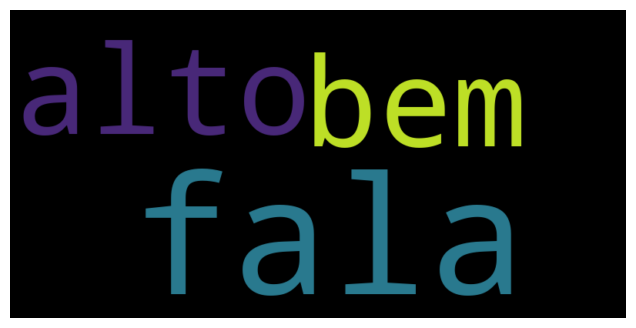

In [55]:
generate_wordcloud(teste, 'pontos_positivos')

In [56]:
teste[0]

{'professor': 'guilherme',
 'escola': 'modelo',
 'data': '21/09/2001',
 'turno': 'manha',
 'ano': '9',
 'autoavaliação': '10',
 'avaliação_curso': '10',
 'nome_formador': 'noemy vascocnelos boto',
 'dominio_conteudo': 'otimo',
 'capacidade_lideranca': 'otimo',
 'clareza': 'otimo',
 'relacionamento': 'otimo',
 'metodologia': 'otimo',
 'pontos_positivos': 'fala bem',
 'pontos_negativos': 'escuta mal',
 'sugestoes': 'trabalhar outros livros',
 'experiencia': 'achei bastante proveitoso'}